# ANN Assignment - Lung Cancer

In [1]:
# load libraries
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_csv('./dataset/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
# number of rows and columns
df.shape

(309, 16)

In [4]:
# data type of each column
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [5]:
# summary of the data: column names, total no.of non-null values, data types, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
# summary statistics
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
# summary statistics for object data types
df.describe(include=['O'])

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [8]:
# get the count of missing or null values
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
# count of duplicate rows
df[df.duplicated()].shape

(33, 16)

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
304     True
305     True
306     True
307     True
308     True
Length: 309, dtype: bool

In [11]:
# remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [12]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [13]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64

In [14]:
# preprocessing provides collection of functions and classes for preprocessing and transforming data before it is used in machine learning models
from sklearn import preprocessing

# using LabelEncoder to convert 'GENDER' and 'LUNG_CANCER' into numbers
label_encoder = preprocessing.LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

df['GENDER'].value_counts(), df['LUNG_CANCER'].value_counts()

(GENDER
 1    142
 0    134
 Name: count, dtype: int64,
 LUNG_CANCER
 1    238
 0     38
 Name: count, dtype: int64)

In [15]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
X.shape, y.shape

((276, 15), (276,))

### as we can see we have 238 rows with "YES" and only 38 rows with "NO" values. The model trained on this dataset will inaccurately predict the result for "NO" values. Hence upsampling the dataset using SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

# Define the SMOTE oversampler
smote = SMOTE(random_state=42)

In [17]:
# Upsample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [18]:
y_resampled.value_counts()

LUNG_CANCER
1    238
0    238
Name: count, dtype: int64

In [19]:
X_resampled.shape, y_resampled.shape

((476, 15), (476,))

In [20]:
from keras.models import Sequential
from keras.layers import Dense

from keras.initializers import GlorotUniform

In [21]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [22]:
# create model
model = Sequential()
model.add(Dense(18, input_dim=15, activation='relu', kernel_initializer=GlorotUniform(seed=seed)))
# model.add(Dense(15, activation='relu', kernel_initializer=GlorotUniform(seed=seed)))
model.add(Dense(12, activation='relu', kernel_initializer=GlorotUniform(seed=seed)))
# model.add(Dense(5, activation='relu', kernel_initializer=GlorotUniform(seed=seed)))
# model.add(Dense(3, activation='relu', kernel_initializer=GlorotUniform(seed=seed)))
model.add(Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform(seed=seed)))

In [23]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# fit the model
history = model.fit(X_resampled, y_resampled, validation_split=0.30, epochs=70, batch_size=22, shuffle=False)

Epoch 1/70


16/16 [==============================] - 1s 21ms/step - loss: 0.6964 - accuracy: 0.7147 - val_loss: 1.3757 - val_accuracy: 0.0000e+00
Epoch 2/70
16/16 [==============================] - 0s 5ms/step - loss: 0.6418 - accuracy: 0.6817 - val_loss: 0.9762 - val_accuracy: 0.0000e+00
Epoch 3/70
16/16 [==============================] - 0s 5ms/step - loss: 0.6357 - accuracy: 0.7087 - val_loss: 1.1839 - val_accuracy: 0.0000e+00
Epoch 4/70
16/16 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.7087 - val_loss: 1.0382 - val_accuracy: 0.0000e+00
Epoch 5/70
16/16 [==============================] - 0s 5ms/step - loss: 0.6074 - accuracy: 0.7027 - val_loss: 1.0521 - val_accuracy: 0.0000e+00
Epoch 6/70
16/16 [==============================] - 0s 5ms/step - loss: 0.5946 - accuracy: 0.7027 - val_loss: 1.0391 - val_accuracy: 0.0000e+00
Epoch 7/70
16/16 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.7027 - val_loss: 1.0203 - val_accuracy: 

In [25]:
# evaluate the model
scores = model.evaluate(X_resampled, y_resampled)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

15/15 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8466
accuracy: 84.66%


In [26]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

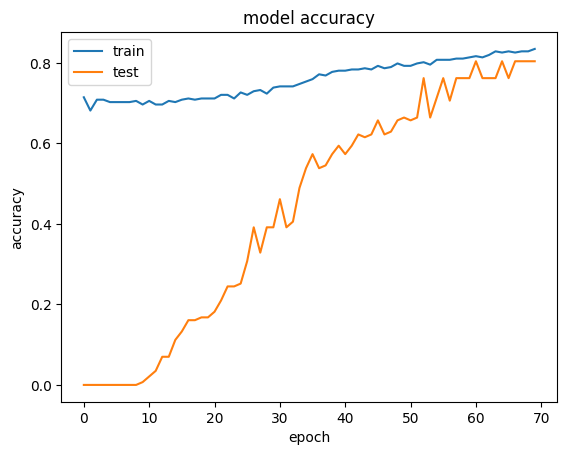

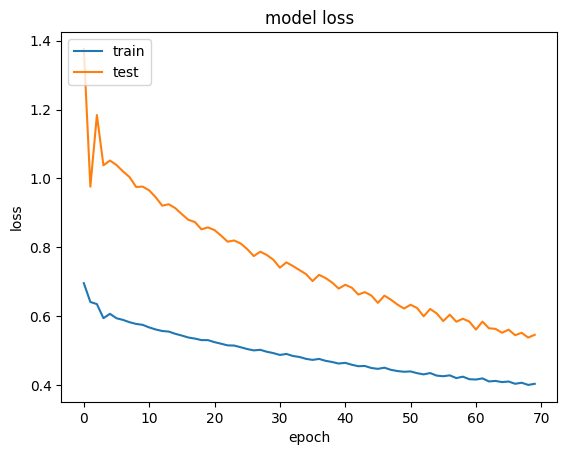

In [27]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()